In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

# 直接读取填充缺失值后的Census-block-group-patterns数据

In [4]:
data = pd.read_csv('E:/pycharmProject/data_visualization/fig_visit/similarity/visit-v2.csv', encoding='utf-8')

In [30]:
def apriori(series, _minSup, _sum):
    attr_value = []
    attr_freq = []
    for values, keys in zip(series.values, series.index):
        if values / _sum >= _minSup:
            attr_value.append([str(keys)])
            
            attr_freq.append(values/_sum)
        else:
            break
    return attr_value, attr_freq

def find_freq(key_set, _sumSup, _sum):
    _node_list = []
    _node_freq = []
    tnt = 0
    for _key in key_set:
        if tnt % 200 == 0:
            print(tnt)
        tnt += 1
        cnt = 0
        for _item in data_list:
            has_flag = True
            for k in _key:
                if k not in _item:
                    has_flag = False
                    break
            if has_flag:
                cnt += 1
        if cnt / _sum >= _sumSup:
            _node_list.append(_key)
            _node_freq.append(cnt/_sum)
    return _node_list, _node_freq

# 把pandas数据转化为列表形式，便于关联规则挖掘

In [5]:
data_list = data.values.tolist()

# 找出频繁项集

## 得到频繁一项集 

In [35]:
data_sum = len(data_list)
candidate_node = []
candidate_freq = []
all_keys = []
all_freq = []
minSup = 0.002

In [36]:
K = 0
_candidate_node, _candidate_node_freq = apriori(data['raw_visit_count'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['raw_visitor_count'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['distance_from_home'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['related_same_day_brand'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['related_same_month_brand'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['top_brands'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['popularity_by_hour'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['popularity_by_day'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq
k=1
print(k, ' iterm frequent pattern:', len(candidate_node), ' frequent pattern has been found')

1  iterm frequent pattern: 59  frequent pattern has been found


## 使用迭代的方法求频繁k+1项集

In [37]:
key_set = []
while len(candidate_node) and k < K:
    for i in range(len(candidate_node)):
        for j in range(len(candidate_node)):
            if i >=j:
                continue
            k_plus_1_node = list(set(candidate_node[i]+candidate_node[j]))
            k_plus_1_node.sort()
            if len(k_plus_1_node) == k+1 and k_plus_1_node not in key_set:  
                key_set.append(k_plus_1_node)
    k += 1
    print(k, ' item frequent pattern:', len(key_set),  ' candidate pattern has been found')
    _candidate_node, _candidate_node_freq = find_freq(key_set, minSup/5, data_sum)
    print(k, ' iterm frequent pattern:', len(_candidate_node), ' frequent pattern has been found')
    key_set = []
    all_keys = all_keys + _candidate_node
    all_freq = all_freq + _candidate_node_freq
    candidate_node = _candidate_node

2  item frequent pattern: 1485  candidate pattern has been found
0
200
400
600
800
1000
1200
1400
2  iterm frequent pattern: 7  frequent pattern has been found


将所有频繁项保存在E:/mining_frequent_patterns/visit/all_frequent_patterns.csv中

In [38]:
path = 'E:/mining_frequent_patterns/visit/'
if not os.path.exists(path):
    os.makedirs(path)
print('All frequent patterns')

file_name = path+'all_frequent_patterns.csv'
print(file_name)

if os.path.exists(file_name):
    f = open(path+'all_frequent_patterns.csv', 'w', newline='')
else:
    f = open(path+'all_frequent_patterns.csv', 'a', newline='')
csv_writer = csv.writer(f)
csv_writer.writerow(['pattern', 'frequency'])
for _keys, _freq in zip(all_keys, all_freq):
    print(_keys, _freq)
    csv_writer.writerow([_keys, _freq])
f.close()

All frequent patterns
E:/mining_frequent_patterns/visit/all_frequent_patterns.csv
['["Dunkin\' Donuts"]'] 0.03784633932982518
['["starbucks"]'] 0.02125740496489582
['["Wawa"]'] 0.015972514945904664
['["walmart"]'] 0.015791215116779753
['["mcdonalds"]'] 0.01421843909912115
['["7-Eleven US"]'] 0.011947658739331637
['["Publix Super Markets"]'] 0.011095549542444556
['["QuikTrip"]'] 0.009237226293914219
['["Kroger"]'] 0.006372688993740623
['["Chick-fil-A"]'] 0.005837854497822136
['["Chevron"]'] 0.0054661898481160685
['["Sheetz"]'] 0.005330214976272385
['["Safeway"]'] 0.005253162548894298
['["Meijer"]'] 0.005103590189866246
['["H-E-B"]'] 0.004673003095694583
['["Kwik Trip"]'] 0.0042650784801635325
['["Costco Wholesale Corp."]'] 0.004251480992979164
['["ARCO"]'] 0.004052051180941762
['["Circle K Stores"]'] 0.0036939840184200628
['["King Soopers"]'] 0.0035172166850232743
['["Speedway"]'] 0.003227136958423417
['["Dunkin\' Donuts","Stop & Shop"]'] 0.0030095771634735236
['["Shell Oil"]'] 0.003000

# 导出关联规则到visit/association.csv，并计算支持度和置信度

In [39]:
import copy
wine_dict = {}
file_name = path+'association.csv'
print(file_name)
confidence_list = []
association_list = []
support_list = []
if os.path.exists(file_name):
    f = open(path+'association.csv', 'w', newline='')
else:
    f = open(path+'association.csv', 'a', newline='')
csv_writer = csv.writer(f)
csv_writer.writerow(['key1', 'key2', 'confidence', 'support' ])
for _keys, _freq in zip(all_keys, all_freq):
    wine_dict[str(_keys)] = _freq
    if len(_keys) == 1:
        continue
    for i in range(len(_keys)):
        tmp_list = copy.deepcopy(_keys)
        key1 = [_keys[i]]
        tmp_list.remove(_keys[i])
        key2 = tmp_list
        if str(key1)+'-->'+str(key2) in association_list:
            continue
        confidence1 = _freq / wine_dict[str(key1)]
        print(key1, '-->', key2, ', confidence is ', confidence1, ', support is ', _freq)
        confidence_list.append(confidence1)
        association_list.append(str(key1)+'-->'+str(key2))
        support_list.append(_freq)
        csv_writer.writerow([key1, key2, confidence1,  _freq])
f.close()

E:/mining_frequent_patterns/visit/association.csv
['["Dunkin\' Donuts"]'] --> ['["United States Postal Service (USPS)"]'] , confidence is  0.036766467065868266 , support is  0.0013914761885336923
['["United States Postal Service (USPS)"]'] --> ['["Dunkin\' Donuts"]'] , confidence is  0.027230796522973215 , support is  0.0013914761885336923
['["Dunkin\' Donuts"]'] --> ['["National Association for the Education of Young Children (NAEYC)"]'] , confidence is  0.013772455089820359 , support is  0.0005212370087341192
['["National Association for the Education of Young Children (NAEYC)"]'] --> ['["Dunkin\' Donuts"]'] , confidence is  0.055771096023278365 , support is  0.0005212370087341192
['["Cricket Wireless"]'] --> ['["Dunkin\' Donuts"]'] , confidence is  0.05926860025220681 , support is  0.00042605459844354096
['["Dunkin\' Donuts"]'] --> ['["Cricket Wireless"]'] , confidence is  0.01125748502994012 , support is  0.00042605459844354096
['["United States Postal Service (USPS)"]'] --> ['["st

# 对规则进行评价和分析

## 使用Lift规则对关联关系进行评价和分析 

结果保存在visit/evaluation.csv中

In [40]:
file_name = path+'evaluation.csv'
print(file_name)
if os.path.exists(file_name):
    f = open(path+'evaluation.csv', 'w', newline='')
else:
    f = open(path+'evaluation.csv', 'a', newline='')
csv_writer = csv.writer(f)
csv_writer.writerow(['Lift evaluation'])
csv_writer.writerow(['key1', 'key2', 'lift' ])
lift_list = []
lift_name = []
for _keys, _freq in zip(all_keys, all_freq):
    if len(_keys) == 1:
        continue
    for i in range(len(_keys)):
        tmp_list = copy.deepcopy(_keys)
        key1 = [_keys[i]]
        tmp_list.remove(_keys[i])
        tmp_list.sort()
        key2 = tmp_list
        if str(key1)+"-->"+str(key2) in lift_name:
            continue
        lift = _freq / wine_dict[str(key1)] / wine_dict[str(key2)]  
        print(key1, '-->', key2, ', lift is ', lift)
        lift_name.append(str(key1)+"-->"+str(key2))
        lift_list.append(lift)
        csv_writer.writerow([str(key1)+"-->"+str(key2), lift])

E:/mining_frequent_patterns/visit/evaluation.csv
['["Dunkin\' Donuts"]'] --> ['["United States Postal Service (USPS)"]'] , lift is  0.7195093899481506
['["United States Postal Service (USPS)"]'] --> ['["Dunkin\' Donuts"]'] , lift is  0.7195093899481506
['["Dunkin\' Donuts"]'] --> ['["National Association for the Education of Young Children (NAEYC)"]'] , lift is  1.4736192987448962
['["National Association for the Education of Young Children (NAEYC)"]'] --> ['["Dunkin\' Donuts"]'] , lift is  1.4736192987448962
['["Cricket Wireless"]'] --> ['["Dunkin\' Donuts"]'] , lift is  1.5660325754543876
['["Dunkin\' Donuts"]'] --> ['["Cricket Wireless"]'] , lift is  1.5660325754543876
['["United States Postal Service (USPS)"]'] --> ['["starbucks"]'] , lift is  0.842874844964715
['["starbucks"]'] --> ['["United States Postal Service (USPS)"]'] , lift is  0.842874844964715
['["United States Postal Service (USPS)"]'] --> ['["Wawa"]'] , lift is  0.816330458699081
['["Wawa"]'] --> ['["United States Post

In [41]:
indexes = np.argsort(lift_list)
indexes = list(reversed(indexes))
for i in range(6):
    _index = indexes[i]
    print(lift_name[_index], ' lift is ', lift_list[_index])

['["United States Postal Service (USPS)"]']-->['["7-Eleven US"]']  lift is  2.0915783189865147
['["7-Eleven US"]']-->['["United States Postal Service (USPS)"]']  lift is  2.0915783189865147
['["Dunkin\' Donuts"]']-->['["Cricket Wireless"]']  lift is  1.5660325754543876
['["Cricket Wireless"]']-->['["Dunkin\' Donuts"]']  lift is  1.5660325754543876
['["National Association for the Education of Young Children (NAEYC)"]']-->['["Dunkin\' Donuts"]']  lift is  1.4736192987448962
['["Dunkin\' Donuts"]']-->['["National Association for the Education of Young Children (NAEYC)"]']  lift is  1.4736192987448962


输出前六位的关联关系，分别是：

['["United States Postal Service (USPS)"]']-->['["7-Eleven US"]']

['["7-Eleven US"]']-->['["United States Postal Service (USPS)"]']

['["Dunkin\' Donuts"]']-->['["Cricket Wireless"]']

['["Cricket Wireless"]']-->['["Dunkin\' Donuts"]']

['["National Association for the Education of Young Children (NAEYC)"]']-->['["Dunkin\' Donuts"]']

['["Dunkin\' Donuts"]']-->['["National Association for the Education of Young Children (NAEYC)"]']

其lift值分别为2.09, 2.09, 1.57, 1.57, 1.47, 1.47

["United States Postal Service (USPS)"]是top_brands

["7-Eleven US"]是related_same_day_brand

["Dunkin\' Donuts"]是top_brands

["Cricket Wireless"]是related_same_day_brand

["National Association for the Education of Young Children (NAEYC)"]是top_brands

可以看出，这些关系都是top_brands和related_same_day_brand之间的关系。对于第一条规则，United States Postal Service (USPS)（邮局）和7-Eleven US（便利店）联系较深，可以分析出，可能便利店在邮局的旁边，因此，人们要先去便利店买邮票，再去邮局寄东西。

而Cricket Wireless（网络经销商）和Dunkin' Donuts（咖啡和烘焙食品连锁品牌）相关联，可能是因为，去Cricket Wireless喜欢顺手在他的旁边要一杯咖啡，等候经销商的服务。

## 使用Cosine规则对关联关系进行评价和分析

结果保存在visit/evaluation.csv中

In [43]:
csv_writer.writerow(['Cosine evaluation'])
csv_writer.writerow(['key1', 'key2', 'cosine' ])
cos_list = []
cos_name = []
for _keys, _freq in zip(all_keys, all_freq):
    if len(_keys) == 1:
        continue
    for i in range(len(_keys)):
        tmp_list = copy.deepcopy(_keys)
        key1 = [_keys[i]]
        tmp_list.remove(_keys[i])
        tmp_list.sort()
        key2 = tmp_list
        if str(key1)+"-->"+str(key2) in cos_name:
            continue
        cos = _freq / np.sqrt(wine_dict[str(key1)]*wine_dict[str(key2)])  
        print(key1, '-->', key2, ', cosine is ', cos)
        cos_name.append(str(key1)+"-->"+str(key2))
        cos_list.append(cos)
        csv_writer.writerow([str(key1)+"-->"+str(key2), cos])
f.close()

['["Dunkin\' Donuts"]'] --> ['["United States Postal Service (USPS)"]'] , cosine is  0.031641431439479076
['["United States Postal Service (USPS)"]'] --> ['["Dunkin\' Donuts"]'] , cosine is  0.031641431439479076
['["Dunkin\' Donuts"]'] --> ['["National Association for the Education of Young Children (NAEYC)"]'] , cosine is  0.02771470575868812
['["National Association for the Education of Young Children (NAEYC)"]'] --> ['["Dunkin\' Donuts"]'] , cosine is  0.02771470575868812
['["Cricket Wireless"]'] --> ['["Dunkin\' Donuts"]'] , cosine is  0.02583051257882281
['["Dunkin\' Donuts"]'] --> ['["Cricket Wireless"]'] , cosine is  0.02583051257882281
['["United States Postal Service (USPS)"]'] --> ['["starbucks"]'] , cosine is  0.027779596471101467
['["starbucks"]'] --> ['["United States Postal Service (USPS)"]'] , cosine is  0.027779596471101467
['["United States Postal Service (USPS)"]'] --> ['["Wawa"]'] , cosine is  0.023321708868951765
['["Wawa"]'] --> ['["United States Postal Service (US

In [44]:
indexes = np.argsort(cos_list)
indexes = list(reversed(indexes))
for i in range(6):
    _index = indexes[i]
    print(cos_name[_index], ' cosine is ', cos_list[_index])

['["United States Postal Service (USPS)"]']-->['["Dunkin\' Donuts"]']  cosine is  0.031641431439479076
['["Dunkin\' Donuts"]']-->['["United States Postal Service (USPS)"]']  cosine is  0.031641431439479076
['["United States Postal Service (USPS)"]']-->['["7-Eleven US"]']  cosine is  0.030943287630436106
['["7-Eleven US"]']-->['["United States Postal Service (USPS)"]']  cosine is  0.030943287630436106
['["starbucks"]']-->['["United States Postal Service (USPS)"]']  cosine is  0.027779596471101467
['["United States Postal Service (USPS)"]']-->['["starbucks"]']  cosine is  0.027779596471101467


输出前6位的关联关系，分别为：
['["United States Postal Service (USPS)"]']-->['["Dunkin\' Donuts"]']

['["Dunkin\' Donuts"]']-->['["United States Postal Service (USPS)"]']

['["United States Postal Service (USPS)"]']-->['["7-Eleven US"]']

['["7-Eleven US"]']-->['["United States Postal Service (USPS)"]']

['["starbucks"]']-->['["United States Postal Service (USPS)"]']

['["United States Postal Service (USPS)"]']-->['["starbucks"]']

其cosine值分别为 0.032,0.032， 0.031, 0.031, 0.028, 0.028。和使用lift值进行分析相似，都是top_brands和related_same_day_brand之间的联系。上文已经分析，不再赘述。

# 可视化展示

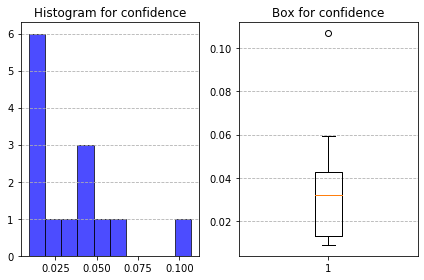

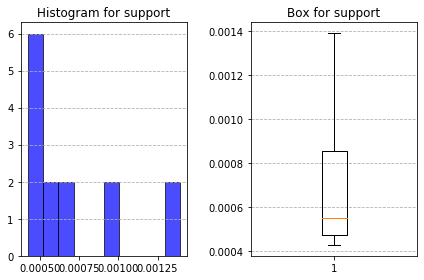

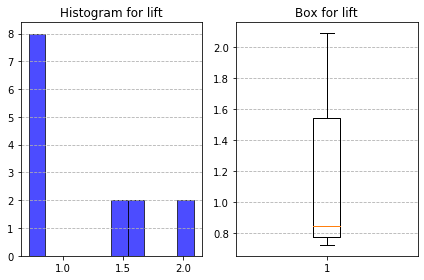

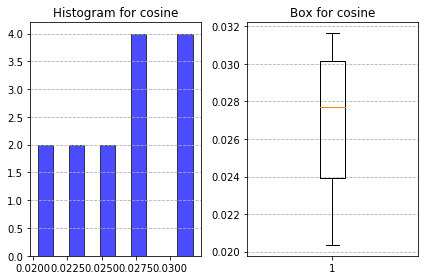

In [47]:
def my_plot(_num_data, _title):
    plt.clf()
    plt.subplot(121)
    plt.hist(_num_data, bins=10, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.title('Histogram for '+_title)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    
    plt.subplot(122)
    plt.boxplot(_num_data, notch=False, sym='o', vert=True)
    plt.title('Box for '+_title)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()
#     plt.savefig(path + _title + '.jpg')
my_plot(confidence_list, 'confidence')
my_plot(support_list, 'support')
my_plot(lift_list, 'lift')
my_plot(cos_list, 'cosine')